### MACHINE LEARNING PROJECT

To start this project I need a dataset. I couldn't find an apropiate one, but I found [this repository][1] by  
Lucas David that gave me a great starting point.

Using his code I downloaded a big amount of pictures by list of artis with a noticeable style difference:

* Caravaggio
* Edgar Degas
* Francisco de Goya
* Katsushika Hokusai
* Frida Kahlo
* Wassily Kandinsky
* Gustav Klimt
* Roy Lichtenstein
* Piet Mondrian
* Claude Monet
* Pablo Picasso
* Jackson Pollock
* Joaquín Sorolla
* Diego Velazquez
* Andy Warhol

It took me around three hours to get all the 5468 pictures.

In this notebook I made basic operations with images and define the functions that let me build my own dataset.

[1]: https://github.com/lucasdavid/wikiart

___
### PREREQUISITES

To process images I'll be using OpenCV library. It is important to take a look at the [docs][1] before running the next cell  
as you may want to use another OpenCV package. For this project I'll use the *'main modules package'*

[1]:https://pypi.org/project/opencv-python/

In [4]:
# !pip install opencv-python

In [5]:
### TODO - .yaml

___
### IMPORTS

In [6]:
# Modules used for data handling / test
import os
import csv
import cv2
import pathlib
import time

from utils import get_collection, show_collection, mklist


# Modules used for EDA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.patches import Rectangle


# Modules used for image processing
import cv2

from collections import Counter
from utils import crop_img, chi_osc, extract_img_data, get_img_rgb
from utils import resize_img, reduce_col_palette, whitespace


# Modules used for ML
from sklearn.cluster import KMeans
from utils import color_quant

In [7]:
# Modules settings
%matplotlib inline

___
### UPDATE UTILS

In [8]:
# This cell only needs to be executed to update utils
# if modified after been imported

%run utils

___
### GETTING IMAGES

In [9]:
collection = get_collection(path='./sample_img/', extensions=['.jpg'])

collection

[PurePosixPath('sample_img/R&M_01.jpg'),
 PurePosixPath('sample_img/R&M_02.jpg'),
 PurePosixPath('sample_img/R&M_04.jpg'),
 PurePosixPath('sample_img/R&M_03.jpg'),
 PurePosixPath('sample_img/R&M_05.jpg'),
 PurePosixPath('sample_img/dset_sample/R&M_01.jpg'),
 PurePosixPath('sample_img/dset_sample/R&M_02.jpg'),
 PurePosixPath('sample_img/dset_sample/R&M_04.jpg'),
 PurePosixPath('sample_img/dset_sample/R&M_03.jpg'),
 PurePosixPath('sample_img/dset_sample/R&M_05.jpg')]

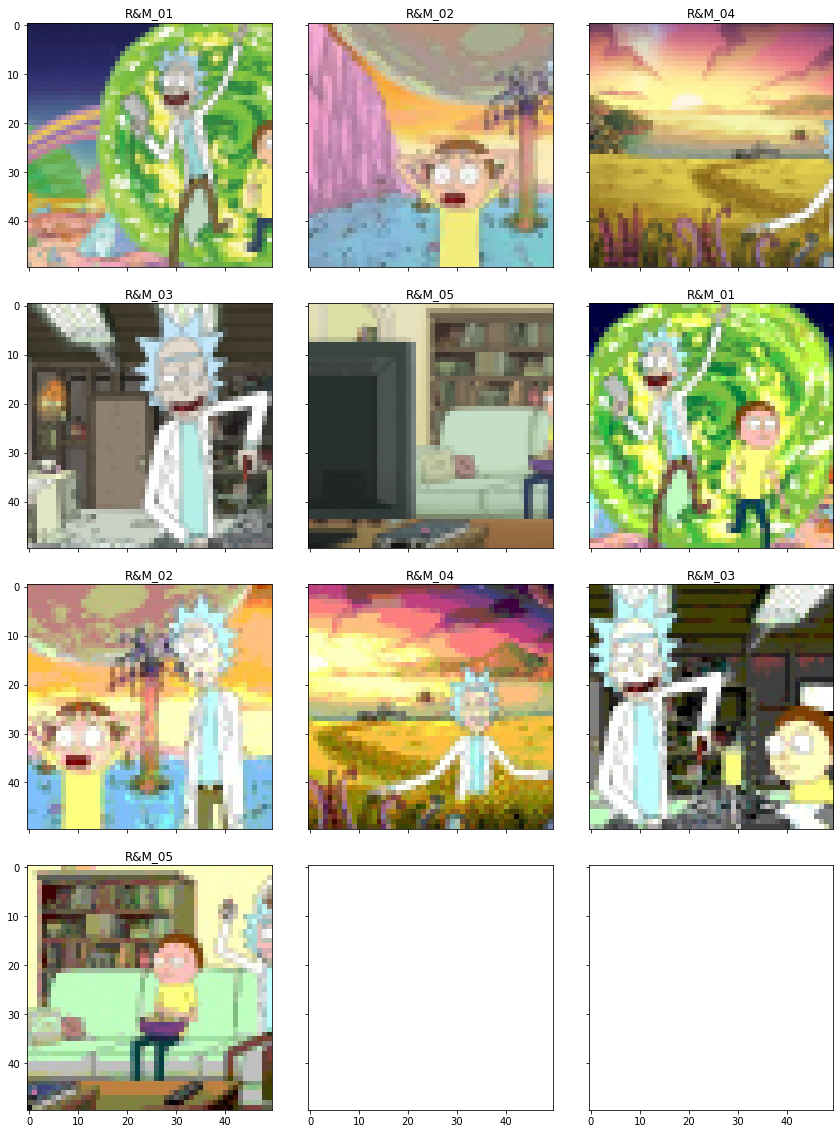

In [10]:
show_collection(collection, cols=3)

___
### IMAGES MANIPULATION

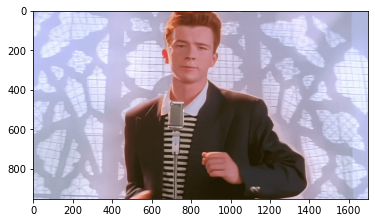

In [11]:
sample = get_img_rgb('./sample_img/secret/sample.jpeg')
plt.imshow(sample);

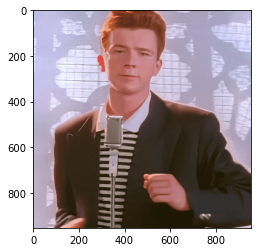

In [12]:
sample = crop_img(sample)
plt.imshow(sample);

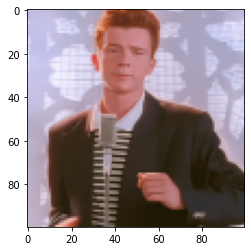

In [13]:
sample = resize_img(sample, 100)
plt.imshow(sample);

Palette reduced to 125 colors.


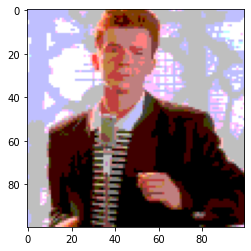

In [14]:
sample = reduce_col_palette(sample, 5, info=True)
plt.imshow(sample);

___
### DATA EXTRACTION

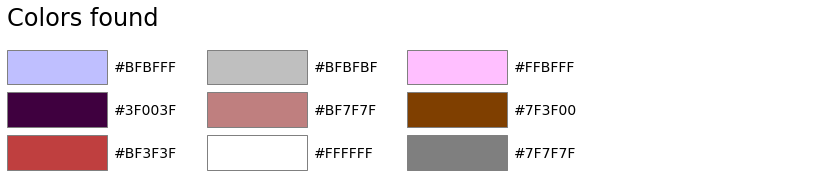

In [15]:
colors, dic_colors = color_quant(sample, 5, num_of_colors=10, show_chart=True)

In [16]:
colors

['#BFBFFF',
 '#3F003F',
 '#BF3F3F',
 '#BFBFBF',
 '#BF7F7F',
 '#FFFFFF',
 '#3F003F',
 '#FFBFFF',
 '#7F3F00',
 '#7F7F7F']

In [17]:
whitespace(sample)

0.99

In [18]:
chi_osc(sample)

0.05249204665959703

In [24]:
data_collection, errors_log = extract_img_data(collection,
                                               square=True,
                                               resize=True,
                                               height=100,
                                               limit_colors=True,
                                               colors_per_channel=5,
                                               target_class='dset_sample',
                                               save=True,
                                               save_path='./sample_img')

0 errors raised from 10 pictures in dset_sample collection.


In [25]:
data_collection

[['R&M_01',
  'dset_sample',
  100,
  100,
  0.99,
  33.0,
  '#7F7F3F',
  '#FFBFBF',
  '#7FBF3F',
  '#FFFF3F',
  '#00003F',
  '#FFFFFF',
  '#FFFFBF',
  '#007F3F',
  '#BFBFBF',
  '#3FBF3F'],
 ['R&M_02',
  'dset_sample',
  100,
  100,
  0.99,
  99.0,
  '#FFFFFF',
  '#BF7F7F',
  '#FFBFBF',
  '#FFFF7F',
  '#7FBFFF',
  '#7F3F3F',
  '#BFBF7F',
  '#FFBF7F',
  '#7FBFBF',
  '#FFFFBF'],
 ['R&M_04',
  'dset_sample',
  100,
  100,
  0.99,
  4.95,
  '#7F7F00',
  '#BFBF7F',
  '#BF3F7F',
  '#FFBF3F',
  '#FFFFFF',
  '#7F3F3F',
  '#FFFF7F',
  '#FF7F7F',
  '#3F0000',
  '#BF7F00'],
 ['R&M_03',
  'dset_sample',
  100,
  100,
  0.99,
  0.16203,
  '#7F3F00',
  '#FFFFBF',
  '#3F3F3F',
  '#BFBFBF',
  '#3F3F3F',
  '#7F7F7F',
  '#FFFFFF',
  '#3F3F00',
  '#BFFFFF',
  '#FFFF7F'],
 ['R&M_05',
  'dset_sample',
  100,
  100,
  0.99,
  1.04211,
  '#3F0000',
  '#FFBFBF',
  '#7F7F7F',
  '#BFFFBF',
  '#BFBF7F',
  '#FFFFBF',
  '#7F3F00',
  '#7F7F3F',
  '#7FBF7F',
  '#3F3F3F'],
 ['R&M_01',
  'dset_sample',
  100,
  100,
 

In [26]:
errors_log[-1]

'0 errors raised from 10 pictures in dset_sample collection.'

___
### BUILD DATASET

First of all, I will create a *collection* for each artist that later on I will merge into a *museum*

In [27]:
valid_extensions = ['.jpg', '.jpeg']

dset_caravaggio = get_collection('./images/raw_museum/caravaggio/', valid_extensions)
dset_degas = get_collection('./images/raw_museum/degas', valid_extensions)
dset_goya = get_collection('./images/raw_museum/goya', valid_extensions)
dset_hokusai = get_collection('./images/raw_museum/hokusai', valid_extensions)
dset_kahlo = get_collection('./images/raw_museum/kahlo', valid_extensions)
dset_kandinsky = get_collection('./images/raw_museum/kandinsky', valid_extensions)
dset_klimt = get_collection('./images/raw_museum/klimt', valid_extensions)
dset_lichtenstein = get_collection('./images/raw_museum/lichtenstein', valid_extensions)
dset_mondrian = get_collection('./images/raw_museum/mondrian', valid_extensions)
dset_monet = get_collection('./images/raw_museum/monet', valid_extensions)
dset_picasso = get_collection('./images/raw_museum/picasso', valid_extensions)
dset_pollock = get_collection('./images/raw_museum/pollock', valid_extensions)
dset_rivera = get_collection('./images/raw_museum/rivera', valid_extensions)
dset_sorolla = get_collection('./images/raw_museum/sorolla', valid_extensions)
dset_velazquez = get_collection('./images/raw_museum/velazquez', valid_extensions)
dset_warhol = get_collection('./images/raw_museum/warhol', valid_extensions)

# By now, the museum is just a index
museum = [dset_caravaggio, dset_degas, dset_goya, dset_hokusai, dset_kahlo,
          dset_kandinsky, dset_klimt, dset_lichtenstein, dset_mondrian, dset_monet,
          dset_picasso, dset_pollock, dset_rivera, dset_sorolla, dset_velazquez, dset_warhol]

In [ ]:
dset_caravaggio

[PurePosixPath('images/raw_museum/caravaggio/1593/9223372032559824886.jpg'),
 PurePosixPath('images/raw_museum/caravaggio/1593/186636.jpg'),
 PurePosixPath('images/raw_museum/caravaggio/1593/186724.jpg'),
 PurePosixPath('images/raw_museum/caravaggio/1594/186639.jpg'),
 PurePosixPath('images/raw_museum/caravaggio/1595/186671.jpg'),
 PurePosixPath('images/raw_museum/caravaggio/1595/186691.jpg'),
 PurePosixPath('images/raw_museum/caravaggio/1596/186632.jpg'),
 PurePosixPath('images/raw_museum/caravaggio/1596/186633.jpg'),
 PurePosixPath('images/raw_museum/caravaggio/1596/186635.jpg'),
 PurePosixPath('images/raw_museum/caravaggio/1596/186706.jpg'),
 PurePosixPath('images/raw_museum/caravaggio/1596/9223372032559874214.jpg'),
 PurePosixPath('images/raw_museum/caravaggio/1597/186663.jpg'),
 PurePosixPath('images/raw_museum/caravaggio/1597/186670.jpg'),
 PurePosixPath('images/raw_museum/caravaggio/1597/186677.jpg'),
 PurePosixPath('images/raw_museum/caravaggio/1597/186678.jpg'),
 PurePosixPath

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


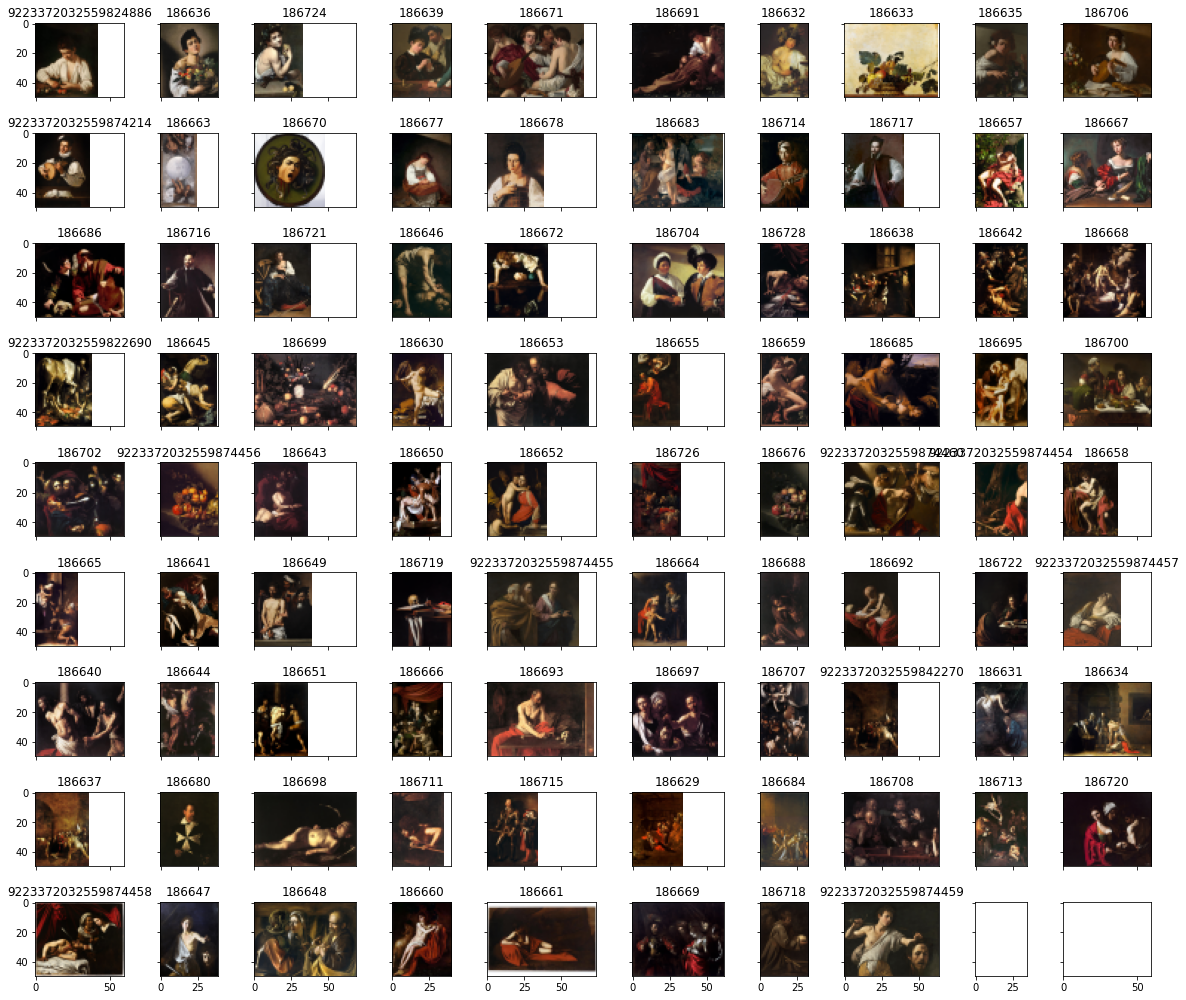

In [ ]:
show_collection(dset_caravaggio, cols=10)

As I am not pretty sure how the images will work I decided to build 5 versions of the dataset:

* The original images (raw_museum)
* Images reduced to 250 px height, with a palette of 216 colorss (6 colors per channel) with the original dimensions (large_museum) 200mins
* Images reduced to 100 px height, with a palette of 125 colorss (5 colors per channel) with the original dimensions ratio (mid_museum) 40mins
* Images reduced to 100 px height, with a palette of 125 colors (5 colors per channel) and cropped to a square form
(mid_sqr_museum) 40mins
* Images reduces to 50 px height, with a palette of 64 colors (4 colors per channel) and cropped to a square form (low_sqr_museum) 90mins

In [28]:
artists = ['caravaggio',
           'degas',
           'goya',
           'hokusai',
           'kahlo',
           'kandinsky',
           'klimt',
           'lichtenstein',
           'mondrian',
           'monet',
           'picasso',
           'pollock',
           'sorolla',
           'velazquez',
           'warhol']

data_collections = [artist + '_raw_collection' for artist in artists]
errors_log_collections = [artist + '_raw_errors' for artist in artists]

In [31]:
raw_data = []

# Build raw_museum
for artist, data_collection, img_collection, errors_log in zip(artists, data_collections, museum, errors_log_collections):
    data_collection, errors_log = extract_img_data(img_collection,
                                                   square=False,
                                                   resize=False,
                                                   limit_colors=False,
                                                   colors_per_channel=4,
                                                   target_class=artist,
                                                   save=False,
                                                   save_path='')
    
    raw_data.append(data_collection)

0 errors raised from 88 pictures in caravaggio collection.


Corrupt JPEG data: 10 extraneous bytes before marker 0xd9


0 errors raised from 626 pictures in degas collection.
0 errors raised from 390 pictures in goya collection.
1 errors raised from 267 pictures in hokusai collection.
0 errors raised from 100 pictures in kahlo collection.
0 errors raised from 227 pictures in kandinsky collection.
0 errors raised from 161 pictures in klimt collection.
0 errors raised from 152 pictures in lichtenstein collection.
0 errors raised from 100 pictures in mondrian collection.
0 errors raised from 1366 pictures in monet collection.


Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file


3 errors raised from 1169 pictures in picasso collection.
0 errors raised from 90 pictures in pollock collection.
0 errors raised from 0 pictures in sorolla collection.
0 errors raised from 367 pictures in velazquez collection.
0 errors raised from 134 pictures in warhol collection.


In [32]:
raw_data = [item for sublist in raw_data for item in sublist]

In [33]:
raw_data

[['9223372032559824886', 'caravaggio', 559, 474],
 ['186636', 'caravaggio', 900, 863],
 ['186724', 'caravaggio', 800, 541],
 ['186639', 'caravaggio', 3239, 4501],
 ['186671', 'caravaggio', 912, 1200],
 ['186691', 'caravaggio', 776, 1089],
 ['186632', 'caravaggio', 800, 694],
 ['186633', 'caravaggio', 2003, 2532],
 ['186635', 'caravaggio', 4226, 3144],
 ['186706', 'caravaggio', 1200, 1536],
 ['9223372032559874214', 'caravaggio', 470, 356],
 ['186663', 'caravaggio', 1320, 667],
 ['186670', 'caravaggio', 3453, 3369],
 ['186677', 'caravaggio', 579, 474],
 ['186678', 'caravaggio', 599, 466],
 ['186683', 'caravaggio', 897, 1103],
 ['186714', 'caravaggio', 900, 645],
 ['186717', 'caravaggio', 1400, 1126],
 ['186657', 'caravaggio', 577, 382],
 ['186667', 'caravaggio', 1048, 1440],
 ['186686', 'caravaggio', 6496, 9449],
 ['186716', 'caravaggio', 900, 667],
 ['186721', 'caravaggio', 1198, 930],
 ['186646', 'caravaggio', 2664, 2362],
 ['186672', 'caravaggio', 484, 400],
 ['186704', 'caravaggio', 

In [34]:
with open('./data/raw_museum/raw_data.csv', "w", newline="") as datafile:
    writer = csv.writer(datafile)            
    writer.writerows(raw_data)

In [ ]:
# Build low_sqr_museum
for artist, data_collection, img_collection, errors_log in zip(artists, data_collections, museum, errors_log_collections):
    data_collection, errors_log = extract_img_data(img_collection,
                                                   square=True,
                                                   resize=True,
                                                   height=50,
                                                   limit_colors=True,
                                                   colors_per_channel=4,
                                                   target_class=artist,
                                                   save=True,
                                                   save_path='./images/low_sqr_museum')

/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possi

3 errors raised from 88 pictures in caravaggio collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possi

38 errors raised from 626 pictures in degas collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possi

101 errors raised from 390 pictures in goya collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possi

57 errors raised from 267 pictures in hokusai collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


3 errors raised from 100 pictures in kahlo collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possi

18 errors raised from 227 pictures in kandinsky collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possi

51 errors raised from 161 pictures in klimt collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


9 errors raised from 152 pictures in lichtenstein collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possi

23 errors raised from 100 pictures in mondrian collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possi

294 errors raised from 1366 pictures in monet collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possi

185 errors raised from 1169 pictures in picasso collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


5 errors raised from 90 pictures in pollock collection.
0 errors raised from 0 pictures in rivera collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


8 errors raised from 367 pictures in sorolla collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possi

12 errors raised from 134 pictures in velazquez collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possi

61 errors raised from 231 pictures in warhol collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


In [25]:
# Build medium_sqr_museum
for artist, data_collection, img_collection, errors_log in zip(artists, data_collections, museum, errors_log_collections):
    data_collection, errors_log = extract_img_data(img_collection,
                                                   square=True,
                                                   resize=True,
                                                   height=100,
                                                   limit_colors=True,
                                                   colors_per_channel=5,
                                                   target_class=artist,
                                                   save=True,
                                                   save_path='./images/mid_sqr_museum')

0 errors raised from 88 pictures in caravaggio collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
Corrupt JPEG data: 10 extraneous bytes before marker 0xd9
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


40 errors raised from 626 pictures in degas collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possi

105 errors raised from 390 pictures in goya collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possi

47 errors raised from 267 pictures in hokusai collection.
7 errors raised from 100 pictures in kahlo collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


22 errors raised from 227 pictures in kandinsky collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possi

54 errors raised from 161 pictures in klimt collection.
6 errors raised from 152 pictures in lichtenstein collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


18 errors raised from 100 pictures in mondrian collection.
292 errors raised from 1366 pictures in monet collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possi

157 errors raised from 1169 pictures in picasso collection.
5 errors raised from 90 pictures in pollock collection.
0 errors raised from 0 pictures in rivera collection.
8 errors raised from 367 pictures in sorolla collection.
0 errors raised from 134 pictures in velazquez collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possi

57 errors raised from 231 pictures in warhol collection.


In [27]:
# Build medium_museum
for artist, data_collection, img_collection, errors_log in zip(artists, data_collections, museum, errors_log_collections):
    data_collection, errors_log = extract_img_data(img_collection,
                                                   square=True,
                                                   resize=True,
                                                   height=100,
                                                   limit_colors=True,
                                                   colors_per_channel=5,
                                                   target_class=artist,
                                                   save=True,
                                                   save_path='./images/mid_museum')

0 errors raised from 88 pictures in caravaggio collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
Corrupt JPEG data: 10 extraneous bytes before marker 0xd9
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


40 errors raised from 626 pictures in degas collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possi

104 errors raised from 390 pictures in goya collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possi

47 errors raised from 267 pictures in hokusai collection.
7 errors raised from 100 pictures in kahlo collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


22 errors raised from 227 pictures in kandinsky collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possi

54 errors raised from 161 pictures in klimt collection.
6 errors raised from 152 pictures in lichtenstein collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


18 errors raised from 100 pictures in mondrian collection.
292 errors raised from 1366 pictures in monet collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possi

158 errors raised from 1169 pictures in picasso collection.
5 errors raised from 90 pictures in pollock collection.
0 errors raised from 0 pictures in rivera collection.
8 errors raised from 367 pictures in sorolla collection.
0 errors raised from 134 pictures in velazquez collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possi

58 errors raised from 231 pictures in warhol collection.


In [29]:
# Build large_museum
for artist, data_collection, img_collection, errors_log in zip(artists, data_collections, museum, errors_log_collections):
    data_collection, errors_log = extract_img_data(img_collection,
                                                   square=False,
                                                   resize=True,
                                                   height=250,
                                                   limit_colors=True,
                                                   colors_per_channel=6,
                                                   target_class=artist,
                                                   save=True,
                                                   save_path='./images/large_museum')

0 errors raised from 88 pictures in caravaggio collection.


Corrupt JPEG data: 10 extraneous bytes before marker 0xd9


34 errors raised from 626 pictures in degas collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possi

110 errors raised from 390 pictures in goya collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possi

29 errors raised from 267 pictures in hokusai collection.
8 errors raised from 100 pictures in kahlo collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


19 errors raised from 227 pictures in kandinsky collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possi

47 errors raised from 161 pictures in klimt collection.
5 errors raised from 152 pictures in lichtenstein collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


11 errors raised from 100 pictures in mondrian collection.
199 errors raised from 1366 pictures in monet collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possi

122 errors raised from 1169 pictures in picasso collection.
7 errors raised from 90 pictures in pollock collection.
0 errors raised from 0 pictures in rivera collection.
8 errors raised from 367 pictures in sorolla collection.
0 errors raised from 134 pictures in velazquez collection.


/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/opt/anaconda3/envs/bridge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


54 errors raised from 231 pictures in warhol collection.


___